<a href="https://colab.research.google.com/github/simon-smida/ML-learning/blob/main/Copy_of_EVO_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://drive.google.com/uc?id=10fVwhdoDJXnRYyJ4UtAnDfUcR2qpI15Y" width="200">
</p>

<h1>EVO: cvičení 4 - Optimalizace parametrů neuronových sítí pro klasifikaci obrazu</h1>

<h2>Řešená úloha - Problém rozpoznávání a klasifikace obrazu</h2>

Jedna z možností, jak realizovat rozpoznávání objektů v obraze, v našem případě ručně psané číslice, představuje využití tzv. umělých neuronových sítí. Přesněji pak konvolučních neuronových sítí (KNN). U takových sítí je třeba pro správnou funkci (správnou identifikaci ručně psaných číslic) nastavit celou řadu parametrů.

Ve své podstatě se tedy jedná o multikriteriální optimalizaci. V přijatelném čase je tento problém hrubou silou velmi těžko řešitelný. Nicméně lze v tomto případě s výhodou použít vhodné evoluční technicky. My se na tento problém podíváme po stránce možného využití diferenciální evoluce, jejíž úkolem bude provádět optimalizaci parametrů neuronové sítě za účelem dosažení co možná nejvyšší úspěšnosti v klasifikační úloze.

___
<h2>MNIST</h2>

Data, která využijeme pro trénování a testování neuronové sítě pochází z datové sady [MNIST](http://yann.lecun.com/exdb/mnist/). Ukázka testovacích/trénovacích obrázků z tohoto datasetu je uvedena níže:

<p align="center">
<img src="https://drive.google.com/uc?id=1A0jEjDgA9WsggkUQhDR7w0Wsrw24OIU7" width="300">
</p>

* Datový soubor MNIST te tvořen obrázky o rozměru 28 x 28 pixelů.
* Každý bod je interpretován jako tzv. gray-scale odstín na 8 bitech.
* Trénovací množinu tvoří sada 60 000 obrázků a k nim příslušné označení třídy.
* Stejnou strukturu, tedy páry obrázek - třída, mají v počtu 10 000 vzorů i testovací data.

S ohledem na poměrně velkou výpočetní náročnost nebudeme pro trénování neuronové sítě a následnou klasifikaci používat sadu MNIST v plném rozsahu, ale bude třeba zvolit významně menší vzorek dat - např. 200 obrázků pro trénování a 100 pro otestování přesnosti klasifikace.

___
<h2>Konvoluční neuronové sítě</h2>

* Typ umělé neuronové sítě vhodný pro zpracování obrazových dat (lokálnost a poziční invariance).
* Zpravidla tvořeny prokládáním konvolučních a pooling vrstev. Poslední vrstvy jsou pak plně propojeny.
* Z low-level příznaků jsou postupně budovány příznaky na vyšších úrovních.
* Neuronové sítě jsou zpravidla trénovány pomocí metod gradientního sestupu. (Aplikace evolučních algoritmů přímo pro trénování vah nepřináší lepší výsledky.)

<p align="center">
<img src="https://drive.google.com/uc?id=121RGlwCo2FW1zLkCTj164BqtUpqCSeZl" width="600">
</p>

<h3>Konvoluční vrstva</h3>

* Konvoluce pomáhá najít vzory v obraze na základě kernelu.
* Trénovaný parametr jsou hodnoty kernelu.

<p align="center">
<img src="https://drive.google.com/uc?id=1i6DSSC-zmcLafq_PCmz2rzE46EJUwKsN" width="300">
</p>

<h3>Pooling vrstva</h3>

* Slouží k podvzorkování obrazu, kdy lokální pixely jsou agregovány do jednoho.
* Zmenšením velikosti snižuje výpočetní nároky.
* Zpravidla použití průměrné či maximální hodnoty.

<p align="center">
<img src="https://drive.google.com/uc?id=1DHl_a-IpVs-x8842l-wQUEPkILuVFHcd" width="300">
</p>

<h3>Plně propojená vrstva</h3>

* Skládá se z neuronů, kdy každý neuron je propojen se všemi výstupy předešlé vrstvy.
* Trénované parametry jsou váhy a biasy neuronů.

<h3>Dropout vrstva</h3>

* Pro dosažení dobře generalizujícího modelu se v průběhu trénování může použít dropout vrstva, která vypíná část neuronů.

___
<h2>Diferenciální evoluce</h2>

* Metoda sloužící k optimalizace vícedimenzionálních reálných hodnot.
* Nevyužívá gradient problému a nevyžaduje tedy diferencovatelný problém jako například metoda gradientního sestupu. Lze ji tedy použít i na optimalizaci nespojitých, zašumělých nebo měnících se problémů.
* DE optimalizuje problém pomocí populace kandidátních řešení, vytvářením nových kandidátních řešení kombinací stávajících podle jednoduchého vzorce a ponecháním těch, která mají nejlepší fitness.
* Algoritmus lze nejlépe pochopit podle následujícího kódu:

```
do {
    // Projiti pres vsechny kandidatni reseni
    for (i=0; i < Np; i++) {

        // Ziskani tri unikatnich reseni na jinem nez aktualnim indexu
        do r1 = floor(rand(0, 1) * NP); while (r1 == i);
        do r2 = floor(rand(0, 1) * NP); while (r2 == r1 or r2 == i);
        do r3 = floor(rand(0, 1) * NP); while (r3 == r2 or r3 == r1 or r3 == i);
        
        // Ziskani dimenze, ktera bude s jistotou krizena
        jrand = floor(D*rand(0,1));
        
        // Postupne vygenerovani trial vektoru pres jednotlive dimenze
        for (j=0; j < D; j++) {

            // S danou pravdepodobnosti pouzij mutovanou hodnotu
            if (rand(0,1) <= Cr or j==jrand) {
                u[i][j] = x[r1][j] + F * (x[r2][j] - x[r3][j]);
            }
            // Pouziti puvodni hodnoty
            else {
                u[i][j] = x[i][j];
            }
        }
    }

    // Ohodnot trial vektory a ponech nejlepsi reseni
    for (i=0; i < Np; i++) {
        if (f(u[i]) <= f(x[i])) {
            x[i] = u[i];
        }
    }

} while (nejsou splneny ukoncovaci podminky);
```

<p align="center">
<img src="https://drive.google.com/uc?id=11vx0Lt_kHKfRGqxN4tbLwX7z-zDtW2je" width="500">
</p>




___
<h2>Úkoly</h2>

1. Seznámit se se základy konvolučních neuronových sítí, diferenciální evoluce a použité datové sady MNIST.
2. Seznámit se s implementací diferenciální evoluce a jejího aplikování na optimalizaci parametrů konvoluční neuronové sítě.
3. Doplňte kód mutace v implementaci diferenciální evoluce.
4. Pomocí experimentů zjistěte vhodné nastavení paramaterů diferenciální evoluce pro nalezení KNN s minimální chybou.
5. Uložte si nejlepší nalezené parametry a výsledky získané za jejich pomocí.
6. Použijte optimalizované parametry pro natrénování a otestování sítě na kompletní datové sadě MNIST a uložte si získané výsledky.
7. Zkuste upravit funkci `obj()` za účelem minimalizace počtu parametrů neuronové sítě.

___

Import potřebných knihoven.

In [1]:
from tqdm import tqdm

from numpy import asarray, clip, argmin, min, round, expand_dims, round, minimum, maximum, rint
from numpy.random import rand, choice, randint

from tensorflow import keras
from keras import Input
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

Příprava datasetu MNIST pro trénování a následné testování KNN.

In [2]:
def prep_dataset(train_size, test_size):
    # Pocet trid datasetu a pouzita cast dat
    num_classes = 10

    # Nacteni trenovacich a testovacich dat
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Omezeni poctu prvku na zadany pocet
    x_train = x_train[:train_size]
    y_train = y_train[:train_size]
    x_test = x_test[:test_size]
    y_test = y_test[:test_size]

    # Prevedeni vstupu z 0 az 255 na 0 az 1
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    # Overeni velikosti dat
    x_train = expand_dims(x_train, -1)
    x_test = expand_dims(x_test, -1)

    # Tisk informaci o datasetu
    print("Input shape:", x_train.shape[1:4])
    print('Train samples:', x_train.shape[0])
    print('Test samples:', x_test.shape[0])

    # Prevod cilovych dat na one-hot-encoding
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # Navraceni pole s potrebnymi udaji (pocet trid, tvar vstupnich vektoru, trenovaci a testovaci data)
    return num_classes, x_train.shape[1:4], x_train, y_train, x_test, y_test

Vytvoření model KNN podle zadaných parametrů.

In [3]:
def compile_model(params, num_classes, input_shape):

    # Zaokrouhleni hodnot pro pouziti v Keras
    r_params = rint(params).astype(int)

    # Vytvoreni sekvencniho modelu
    model = Sequential()

    # Prvni vstupni vrstva
    model.add(Input(shape=input_shape))

    # Prvni vrstva konvoluce a poolingu
    model.add(Conv2D(r_params[0], kernel_size=(r_params[1], r_params[2]), activation="relu"))
    model.add(MaxPooling2D(pool_size=(r_params[3], r_params[4])))

    # Druha vrstva konvoluce a poolingu
    if int(r_params[14]) >= 1:
        model.add(Conv2D(r_params[5], kernel_size=(r_params[6], r_params[7]), activation="relu"))
        model.add(MaxPooling2D(pool_size=(r_params[8], r_params[9])))

    # Zplosteni site a doplnkova Dropout vrstva
    model.add(Flatten())
    model.add(Dropout(params[10]))

    # Posledni vystupni vrstva
    model.add(Dense(num_classes, activation="softmax"))

    return model

Trénovaní zadané neuronové sítě a získání výsledné přesnosti.

In [4]:
def train(params, num_classes, input_shape, x_train, y_train):

    try:
        # Ziskani modelu KNN
        model = compile_model(params, num_classes, input_shape)

    except:
        # Pokud sit neni mozne vytvorit, je parametrum udelena fitness nekonecno
        return float("inf"), None

    # Nastaveni velikosti batch a poctu epoch
    batch_size = rint(params[11]).astype(int)
    epochs = rint(params[12]).astype(int)

    # Call-back pro pripadne vcasne ukonceni
    callback = EarlyStopping(monitor='loss', patience=params[13])

    # Vytvornei site
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Trenovani site
    res = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[callback], verbose=0)#, use_multiprocessing=True)

    # Vraceni chyby vysledne site
    return res.history['val_loss'][-1], model

Algoritmus diferenciální evoluce.

In [5]:
class DE():
    # Inicializace a ulozeni velikosti populace, poctu a rozsahu optimalizovanych hodnot, pravdepodobnosti krizeni a koeficientu F
    def __init__(self, pop_size, cr, F, train_size, test_size, bounds):

        if pop_size < 4:
            print('Pop size set to minimal value of 4.')
        self.pop_size = maximum(4, pop_size)

        if cr < 0.0 or cr > 1.0:
            print('cr clipped to allowed range [0;1].')
        self.cr = maximum(0.0, minimum(1.0, cr))

        if F < 0.0 or F > 1.0:
            print('F clipped to allowed range [0;1].')
        self.F = maximum(0.0, minimum(1.0, F))

        self.bounds = bounds

        # Nacteni datasetu
        self.num_classes, self.input_shape, self.x_train, self.y_train, self.x_test, self.y_test = prep_dataset(train_size, test_size)

    # Ziskani fitness kandidatniho jedince
    def obj(self, x):
        result = train(x, self.num_classes, self.input_shape, self.x_train, self.y_train)
        return result

    # Operator krizeni
    def crossover(self, r1, r2, r3, target):

        # Size of vector
        dims = len(target)

        # TODO provedeni mutace
        mutated = r1 + self.F * (r2 - r3)

        # Zajisteni hranicnich hodnot
        mutated = [clip(mutated[i], self.bounds[i, 0], self.bounds[i, 1]) for i in range(len(self.bounds))]

        # Ziskani nahodne hodnoty pro kazdy optimalizovany parametr
        p = rand(dims)

        # Zaruceni alespon jednoho krizeni
        jrand = randint(0, dims)

        # Generovani trial vektoru pomoci krizeni
        trial = [mutated[i] if (p[i] < self.cr or i == jrand) else target[i] for i in range(dims)]
        return trial

    # Samotny algoritmus diferencialni evoluce
    def differential_evolution(self, iter):
        # Nahodna inicializace populace kandidatnich reseni v ramci zadanych hranic parametru
        pop = self.bounds[:, 0] + (rand(self.pop_size, len(self.bounds)) * (self.bounds[:, 1] - self.bounds[:, 0])).astype(float)

        # Evaluace pocatecni populace kandidatnich reseni
        print('Start of initial evaluation...')
        obj_all, trained_nets = map(list, zip(*[self.obj(ind) for ind in pop]))

        # Vektor trial vektoru k vyhodnoceni
        trial_vectors = [[float] * len(self.bounds)] * self.pop_size

        # Nalezeni reseni s nejmensi hodnotou chyby a jeho ulozeni
        best_vector = pop[argmin(obj_all)]
        best_obj = min(obj_all)
        prev_obj = best_obj
        best_net = trained_nets[argmin(obj_all)]

        print('Initial evaluation done.')

        # Inicializace listu fitness v prubehu iteraci
        obj_iter = list()

        # Hlavni smycka algoritmu
        for i in range(iter):

            print('Iteration #', i)
            pbar = tqdm(total=self.pop_size, position=0, leave=True)

            # Ziskani trial vektoru
            for j in range(self.pop_size):

                # Vybrani tri jinych kandidatnich reseni: r1, r2, r3
                candidates = [candidate for candidate in range(self.pop_size) if candidate != j]
                r1, r2, r3 = pop[choice(candidates, 3, replace=False)]

                # Provedeni krizeni
                trial_vectors[j] = self.crossover(r1, r2, r3, pop[j])

            # Ohodnoceni trial vektoru a pripadne nahrazeni aktualnich
            for j in range(self.pop_size):

                # Vypocet fitness trial vektoru
                obj_trial, net_trial = self.obj(trial_vectors[j])

                # Nahrazeni target vektoru, pokud trial dosahuje lepsich hodnot
                if obj_trial <= obj_all[j]:
                    pop[j] = trial_vectors[j]  # Nahrazeni vektoru
                    obj_all[j] = obj_trial  # Nahrazeni fitness
                    trained_nets[j] = net_trial  # Nahrazeni natrenovane site

                pbar.update(1)

            pbar.close()

            # Nalezeni noveho nejlepsiho reseni
            best_obj = min(obj_all)

            # Aktualizace nejlepsiho reseni
            if best_obj < prev_obj:
                best_vector = pop[argmin(obj_all)]
                prev_obj = best_obj
                best_net = trained_nets[argmin(obj_all)]

                # Informovani o novem nejlepsim reseni
                print('Nest best solution:', best_vector, ', fitness =', best_obj)

            # Ulozeni nejlepsi fitness v dane iteraci
            obj_iter.append(best_obj)

        # Navraceni nejlepsiho reseni, jeho fitness a historie nejlepsi fitness
        return best_vector, best_obj, obj_iter, best_net

Hlavní funkce pro nalezení optimálních parametrů neuronové sítě.

In [6]:
def find_params(generations, pop_size, cr, F, train_size, test_size, bounds):

    # Inicializace diferencialni evoluce pro optimalizaci KNN
    print('Starting initialisation of DE...')
    de = DE(pop_size, cr, F, train_size, test_size, bounds)
    print('DE initialisation done.')

    # Provedeni optimalizace
    print('Starting the run of diferential evolution...')
    best_vector, best_obj, obj_hist, FINAL_NET = de.differential_evolution(generations)
    print('\nDiferential evolution done\n')

    # Tisk prubehu chyby v prubehu evoluce
    plt.plot(obj_hist)
    plt.title("Best error over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.show()

    # Tisk nejlepsich parametru a jejich fitness
    print('Best fitness:', best_obj, '\nBest vector of params', best_vector, '\n')
    print_params_vector(best_vector)

    # Ukonceni pokud nebyla nalezena zadna funkcni sit
    if FINAL_NET == None:
        print('No net to test!!!')
        return

    # Vytisknuti parametru site pomoci Keras
    print(FINAL_NET.summary())

    # Evaluace site ziskane nejlepsimi parametry na testovacich datech
    score = FINAL_NET.evaluate(de.x_test, de.y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    return best_vector

Tisk parametrů navrhovaných pomocí diferenciální evoluce.

In [7]:
def print_params_vector(params):
    # Zaokrouhleni hodnot stejne jako pri pouziti v Keras
    r_params = rint(params).astype(int)

    print('Parametry (vcetne zaokrouhleni kde je pouzito):')
    print(str(r_params[0]).rjust(5), 'Pocet filtru 1. konvolucni vrstvy\n',
          str(r_params[1]).rjust(4), 'Sirka kernelu 1. konvolucni vrstvy\n',
          str(r_params[2]).rjust(4), 'Vyska kernelu 1. konvolucni vrstvy\n',
          str(r_params[3]).rjust(4), 'Sirka poolu 1. pooling vrstvy\n',
          str(r_params[4]).rjust(4), 'Vyska poolu 1. pooling vrstvy\n',
          str(r_params[5]).rjust(4), 'Pocet filtru 2. konvolucni vrstvy\n',
          str(r_params[6]).rjust(4), 'Sirka kernelu 2. konvolucni vrstvy\n',
          str(r_params[7]).rjust(4), 'Vyska kernelu 2. konvolucni vrstvy\n',
          str(r_params[8]).rjust(4), 'Sirka poolu 2. pooling vrstvy\n',
          str(r_params[9]).rjust(4), 'Vyska poolu 2. pooling vrstvy\n',
          str(params[10]).rjust(4), 'Dropout rate\n',
          str(r_params[11]).rjust(4), 'Velikost mini-batche\n',
          str(r_params[12]).rjust(4), 'Pocet epoch\n',
          str(r_params[13]).rjust(4), 'Early-stopping trpelivost\n',
          str(r_params[14]).rjust(4), 'Pocet vrstev neuronove site\n\n')

Natrénování a otestování KNN na kompletní datové sadě pro finální ověření nalezených parametrů.

In [8]:
def full_train_and_evaluate(params):

    # Vytisknuti pouzitych parametru
    print_params_vector(params)

    # Nacteni datasetu
    num_classes, input_shape, x_train, y_train, x_test, y_test = prep_dataset(60000, 10000)

    # Natrenovani KNN
    val_loss, model = train(params, num_classes, input_shape, x_train, y_train)

    # Tisk parametru site
    print(model.summary())
    print('Validation loss:', val_loss)

    # Evaluace site na testovacich datech
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

Aplikování diferenciální evoluce na zadaný problém.

Starting initialisation of DE...
Input shape: (28, 28, 1)
Train samples: 200
Test samples: 100
DE initialisation done.
Starting the run of diferential evolution...
Start of initial evaluation...
Initial evaluation done.
Iteration # 0


100%|██████████| 7/7 [00:29<00:00,  4.26s/it]


Nest best solution: [354.67889853   5.           5.           4.18506192   3.49854011
 173.04860833   4.36081366   3.78396185   2.8730252    2.50538141
   0.63458259  65.1929553   24.6982322    1.00123425   1.53406873] , fitness = 0.5095051527023315
Iteration # 1


100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


Iteration # 2


100%|██████████| 7/7 [00:19<00:00,  2.74s/it]


Iteration # 3


100%|██████████| 7/7 [00:20<00:00,  2.86s/it]


Nest best solution: [263.28533715   4.13285573   4.48605843   1.57902839   2.87910795
 370.42512432   2.67238612   2.70683719   2.4907998    2.36344746
   0.66326564  63.75639035  20.8473488    0.9274623    1.99383323] , fitness = 0.4569665789604187
Iteration # 4


100%|██████████| 7/7 [00:24<00:00,  3.51s/it]


Nest best solution: [389.12424267   4.53126394   4.23376081   1.69372967   2.68474868
 398.74009946   2.3379089    2.9044645    2.03360783   1.94882402
   0.64176079  60.94155852  18.36698764   1.5795516    2.        ] , fitness = 0.44119125604629517
Iteration # 5


100%|██████████| 7/7 [00:20<00:00,  2.91s/it]


Iteration # 6


100%|██████████| 7/7 [00:27<00:00,  3.91s/it]


Iteration # 7


100%|██████████| 7/7 [00:34<00:00,  4.89s/it]


Iteration # 8


100%|██████████| 7/7 [00:22<00:00,  3.20s/it]


Iteration # 9


100%|██████████| 7/7 [00:22<00:00,  3.23s/it]

Nest best solution: [278.13773576   5.           4.48555643   1.51781771   2.70301175
 386.68861216   3.12967288   1.           2.06536892   1.49370022
   0.71567332  52.06177688  14.51569348   2.           1.99506658] , fitness = 0.42242488265037537

Diferential evolution done



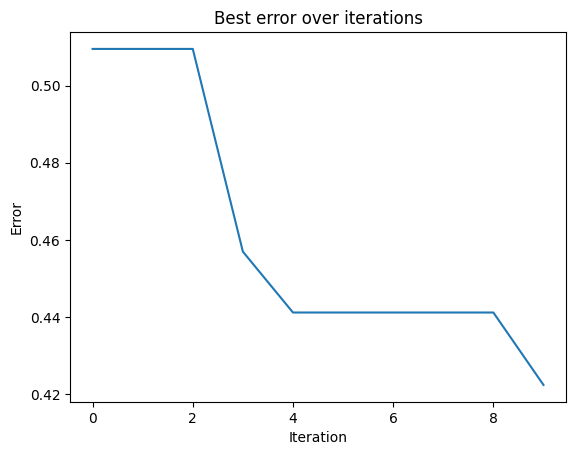

Best fitness: 0.42242488265037537 
Best vector of params [278.13773576   5.           4.48555643   1.51781771   2.70301175
 386.68861216   3.12967288   1.           2.06536892   1.49370022
   0.71567332  52.06177688  14.51569348   2.           1.99506658] 

Parametry (vcetne zaokrouhleni kde je pouzito):
  278 Pocet filtru 1. konvolucni vrstvy
    5 Sirka kernelu 1. konvolucni vrstvy
    4 Vyska kernelu 1. konvolucni vrstvy
    2 Sirka poolu 1. pooling vrstvy
    3 Vyska poolu 1. pooling vrstvy
  387 Pocet filtru 2. konvolucni vrstvy
    3 Sirka kernelu 2. konvolucni vrstvy
    1 Vyska kernelu 2. konvolucni vrstvy
    2 Sirka poolu 2. pooling vrstvy
    1 Vyska poolu 2. pooling vrstvy
 0.7156733189389127 Dropout rate
   52 Velikost mini-batche
   15 Pocet epoch
    2 Early-stopping trpelivost
    2 Pocet vrstev neuronove site


Model: "sequential_334"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 con

In [20]:
params = find_params(generations = 10,  # Pocet iteraci
                     pop_size = 7,  # Velikost populace (minimum je 4)
                     cr = 0.9,  # Pravdepodobnost krizeni [0; 1]
                     F = 0.8,  # Koeficient F [0; 1]
                     train_size = 200,  # Pocet vzorku pouzitych k trenovani
                     test_size = 100,  # Pocet vzorku pouzitych k testovani reseni
                     bounds = asarray([(1, 512),  # Pocet filtru 1. konvolucni vrstvy
                                       (1, 5),     # Sirka kernelu 1. konvolucni vrstvy
                                       (1, 5),     # Vyska kernelu 1. konvolucni vrstvy
                                       (1, 5),     # Sirka poolu 1. pooling vrstvy
                                       (1, 5),     # Vyska poolu 1. pooling vrstvy
                                       (1, 512),  # Pocet filtru 2. skryte vrstvy
                                       (1, 5),     # Sirka kernelu 2. konvolucni vrstvy
                                       (1, 5),     # Vyska kernelu 2. konvolucni vrstvy
                                       (1, 5),     # Sirka poolu 2. pooling vrstvy
                                       (1, 5),     # Vyska poolu 2. pooling vrstvy
                                       (0.3, 0.9),   # Dropout rate [0; 1)
                                       (20, 100),  # Velikost mini-batche
                                       (1, 40),     # Pocet epoch
                                       (0, 2),     # Trpelivost pro vcasne ukonceni trenovani
                                       (1, 2)]))   # Pocet vrstev neuronove site

Ověření nalezených parametrů na kompletní datové sadě.

In [ ]:
full_train_and_evaluate(params)

Parametry (vcetne zaokrouhleni kde je pouzito):
  278 Pocet filtru 1. konvolucni vrstvy
    5 Sirka kernelu 1. konvolucni vrstvy
    4 Vyska kernelu 1. konvolucni vrstvy
    2 Sirka poolu 1. pooling vrstvy
    3 Vyska poolu 1. pooling vrstvy
  387 Pocet filtru 2. konvolucni vrstvy
    3 Sirka kernelu 2. konvolucni vrstvy
    1 Vyska kernelu 2. konvolucni vrstvy
    2 Sirka poolu 2. pooling vrstvy
    1 Vyska poolu 2. pooling vrstvy
 0.7156733189389127 Dropout rate
   52 Velikost mini-batche
   15 Pocet epoch
    2 Early-stopping trpelivost
    2 Pocet vrstev neuronove site


Input shape: (28, 28, 1)
Train samples: 60000
Test samples: 10000


Autor:<br>
Ing. Martin Hurta

Použité zdroje:<br>
* Bidlo. M. Aplikované evoluční algoritmy - Diferenciální evoluce \[prezentace\] EVO, Fakulta informačních technologií, Vysoké učení technické v Brně.
* Team, K. (n.d.). Keras: Deep Learning for humans. https://keras.io/
* Machine Learning Mastery. (2021, October 25). Machine Learning Mastery. MachineLearningMastery.com. https://machinelearningmastery.com/
* Wikipedia contributors. (2022, November 3). Differential evolution. Wikipedia. https://en.wikipedia.org/wiki/Differential_evolution
